In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from scipy.special import factorial

# Random walk

The simplest form of a random walk is one that makes a number of steps, all of the same length, but with the direction chosen at random. In one dimension, the position after $n$ steps is then given by

$$ x_n = \sum_{i=1}^n L_i, $$

where the steps, $L_i$ are either $+L$ or $-L$, with equal probability.

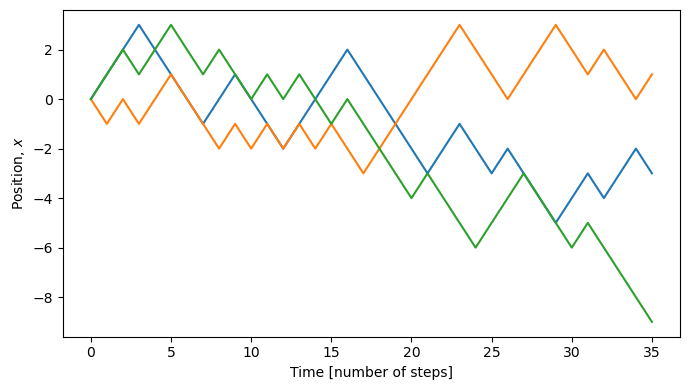

In [2]:
Nt = 35 # Number of time steps
Np = 3  # Number of particles (walkers)
L  = 1  # Step length

# Array to hold Nt steps (plus initial position) of Np random walkers
X = np.zeros((Nt+1, Np))

# Naïve implementation:
# Construct the walks explicity with a for loop,
# with the position after each step equal to the position
# after the previous step, plus a random increment
# (either +L or -L, with equal probability)
for i in range(Nt):
    X[i+1,:] = X[i,:] + np.random.choice([-L, +L], size = Np)
    
# Plot position as function of "time"
fig = plt.figure(figsize = (7, 4))
plt.plot(X)
plt.xlabel('Time [number of steps]')
plt.ylabel('Position, $x$')
plt.tight_layout()

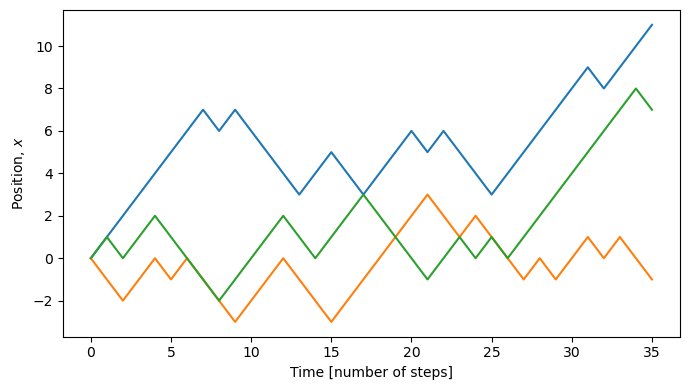

In [3]:
Nt = 35 # Number of time steps
Np = 3  # Number of particles (walkers)
L  = 1  # Step length

# Array to hold Nt steps (plus initial position) of Np random walkers
X = np.zeros((Nt+1, Np))

# Faster implementation:
# Create an array of random increments,
# and take the cumulative sum
W = np.random.choice([-L, +L], size=(Nt, Np))
X[1:,:] = np.cumsum(W, axis=0)

# Plot position as function of "time"
fig = plt.figure(figsize = (7, 4))
plt.plot(X)
plt.xlabel('Time [number of steps]')
plt.ylabel('Position, $x$')
plt.tight_layout()

## Mean square displacement

The mean square displacement of a random walker increases linearly with the number of steps (i.e., linearly in time, if we imagine the steps to happen at fixed intervals). We can demonstrate this by using mathematical induction (see for example Feynman et al., Vol. III, chapter 41). For simplicity, assume that we start out at $x_0=0$. Then the mean square displacement is given by

\begin{align}
\langle x^2_n \rangle
&= \left\langle \left( x_{n-1} + L_n \right)^2 \right\rangle \\
&= \left\langle x_{n-1}^2 \right\rangle +\left\langle 2 x_{n-1} L_n \right\rangle + \left\langle L_n^2 \right\rangle
\end{align}

where the angle brackets, $\langle \ldots \rangle$, means ensemble average (average over many realisations, essentially the same as the expectation value).

Since $x_{n-1}$ and $L_n$ are both symmetrically distributed about zero (equally likely to be positive or negative), the expectation value of their product is zero. We also have that $\left\langle L_n^2 \right\rangle = L^2$, since $L_n$ is either $-L$ or $+L$. Hence we have

\begin{align}
\langle x^2_n \rangle
&= \left\langle x_{n-1}^2 \right\rangle + L^2.
\end{align}

If we start by looking at 
\begin{align}
\langle x^2_1 \rangle
&= \left\langle x_0^2 \right\rangle + L^2 = L^2,
\end{align}

then we see that by induction we have

\begin{align}
\langle x^2_n \rangle &= n \, L^2.
\end{align}

## Example: Find mean square displacement numerically

We generate some number of random walkers, and plot their mean square displacement as a function of number of steps. Observe that increasing the number of walkers give a better fit with the theory.

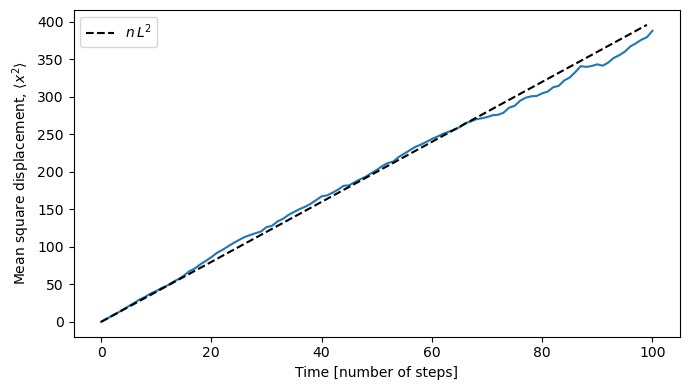

In [4]:
Nt = 100 # Number of time steps
Np = 1000 # Number of particles (walkers)
L  = 2   # Step length

# Using same implementation as above, but more compact
X = np.zeros((Nt+1, Np))
X[1:,:] = np.cumsum(np.random.choice([-L, +L], size=(Nt, Np)), axis=0)

# Plot mean square displacement as function of "time"
fig = plt.figure(figsize = (7, 4))
plt.plot(np.mean(X**2, axis=1))
plt.plot(np.arange(Nt) * L**2, '--', c='k', label='$n\,L^2$')
plt.xlabel('Time [number of steps]')
plt.ylabel('Mean square displacement, $\langle x^2 \\rangle$')
plt.legend()
plt.tight_layout()

## Distribution of random walkers

Next, we will look at the distribution when we consider a large number of random walkers. To investigate the distribution, we will use a histogram of positions at different times.

We can find the distribution analytically. The approach here is taken from Chandrasekhar (1943). Assume that a random walker starts at $0$, takes steps of constant length $L$, and steps to left or right with equal probability, $p=1/2$. We want to find the probability, $W(n, x)$ of being at position $xL$ after $n$ steps.

In order to be at position $xL$ after $n$ steps, the walker must have taken $k$ steps to the right and $n-k$ steps to the left, such that $k-(n-k) = x$, which gives $k=\frac{n+x}{2}$ and $n-k=\frac{n-x}{2}$.

Each distinct sequence of $n$ steps has probability $\left(1/2\right)^n$ of occurring. Hence, the probability of being at position $xL$ after $n$ steps is the number of distinct sequences of steps that lead to this position, multiplied by $\left(1/2\right)^n$.

The number of paths with $k$ steps to the right and $n-k$ steps to the left is $\frac{n!}{k! \; (n-k)!}$, and hence we find

$$W(n,x) = \frac{n!}{k! \, (n-k)!} \left(\frac{1}{2}\right)^n = \frac{n!}{\left(\frac{n+x}{2}\right)! \, \left(\frac{n-x}{2}\right)!} \left(\frac{1}{2}\right)^n. $$

This is the Binomial distribution for $\frac{n+x}{2}$ successes, after $n$ trials with equal probability of success and failure.

Note that if $n$ is even, then $x$ must also be even, and if $n$ is odd then $x$ must be odd, since starting at 0 one cannot end up at an even position after an odd number of steps. We can include this in the distribution function above by adding a prefactor that is either 1 or 0, depending on if $n$ and $x$ have the same parity.

$$W(n,x) = \frac{1 + (-1)^{n+x}}{2} \times \frac{n!}{\left(\frac{n+x}{2}\right)! \, \left(\frac{n-x}{2}\right)!} \left(\frac{1}{2}\right)^n. $$

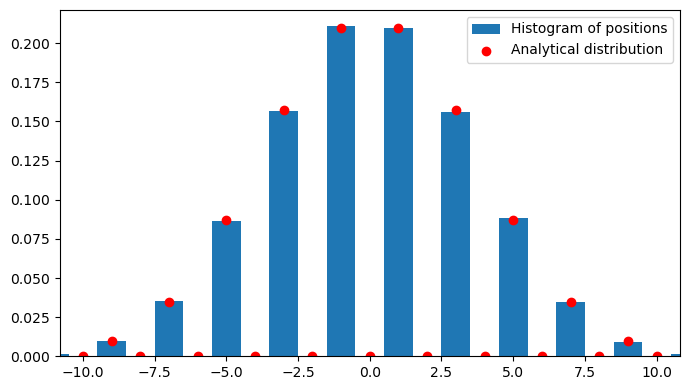

In [5]:
Nt = 13 # Number of time steps
Np = 100000 # Number of particles (walkers)
L  = 1   # Step length

# Using same implementation as above, but more compact
X = np.zeros((Nt+1, Np))
X[1:,:] = np.cumsum(np.random.choice([-L, +L], size=(Nt, Np)), axis=0)

# Draw a histogram of particle positions at last timestep
fig = plt.figure(figsize = (7, 4))
plt.hist(X[-1,:], bins=np.linspace(-(Nt+1/2)*L, (Nt+1/2)*L, 2*Nt+2), weights=np.ones(Np)/Np, label='Histogram of positions')

# Plot analytical solution
x = np.arange(-Nt, Nt+1)
W = ((1 + (-1)**(Nt+x))/2) * factorial(Nt)/(factorial((Nt+x)/2)*factorial((Nt-x)/2))*0.5**Nt
plt.scatter(x*L, W, c='r', label='Analytical distribution')

# Tweak plot
plt.xlim(-3*L*np.sqrt(Nt), 3*L*np.sqrt(Nt))
plt.legend()
plt.tight_layout()

## Variance of binomial distribution

Recall that the variance of a set of $n$ random numbers, $X = \left\{x_0, ..., x_n\right\}$, is the expectation value of the squared deviation from the mean:

$$  \mathrm{var}(X) = E\left((X-\mu)^2\right) = \left\langle (X-\mu)^2 \right\rangle = \frac{1}{n} \sum_{i=1}^n (x_i - \mu)^2. $$

For random walkers that start out at $0$, and behave symmetrically such that we always have $\mu=0$, this is exactly the same as the mean square displacement.

The variance for number of successes, $k$ in a binomial distribution with $n$ trials and probability $p$ of success and $q=1-p$ for failure, is

$$\mathrm{var}(k) = npq,$$

or in our case with equal probability

$$ \mathrm{var}(k) = \frac{n}{4}.$$

However, we are not directly interested in the number of successes, since the position of our random walker is given by the _sum_ of successes (steps to the right) and failures (steps to the left).

Hence, to find the mean square displacement, $\left\langle x_n^2 \right\rangle$, for a random walker starting at zero, we want to find 

\begin{align}
\left\langle x_n^2 \right\rangle &= \mathrm{var}\big(kL - (n-k)L \big) \\
             &= L^2 \; \mathrm{var}(2k - n)
\end{align}

Since $n$ is a constant, it does not affect the variance so we can drop it, and find

\begin{align}
\left\langle x_n^2 \right\rangle &= 4 L^2 \; \mathrm{var}(k) \\
             &= nL^2,
\end{align}

where we have used that $\mathrm{var}(k) = n/4$ in our case with equal probability of success (stepping to the right) and failure (stepping to the left).

Note that this is the same result we found by induction earlier.

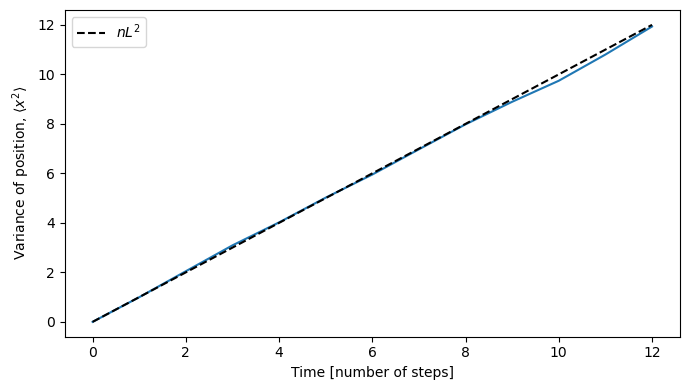

In [6]:
Nt = 13 # Number of time steps
Np = 1000 # Number of particles (walkers)
L  = 1   # Step length

# Using same implementation as above, but more compact
X = np.zeros((Nt, Np))
X[1:,:] = np.cumsum(np.random.choice([-L, +L], size=(Nt-1, Np)), axis=0)

# Plot observed and theoretical variance
fig = plt.figure(figsize=(7,4))
plt.plot(np.var(X, axis=1))
plt.plot(np.arange(Nt), L**2 * np.arange(Nt), '--', c='k', label='$n L^2$')
plt.legend()
plt.xlabel('Time [number of steps]')
plt.ylabel('Variance of position, $\langle x^2 \\rangle$')
plt.tight_layout()

## The Wiener process

Above, we defined a random walk as a series of steps of constant length. Now, we will look at the Wiener process, which is a way of generalising the random walk to a continuous function of time, also called a stochastic process, $W_t$. We will not go deep into the theory of stochastic processes, and we will just think of $W_t$ as a special type of function of time (so we could just as well have written $W(t)$, but $W_t$ is conventional). The main point is that $W_t$ is a random function, meaning that we can generate different realisations that will be different from each other, but have some statistical properties in common.

The Wiener process is a stochastic process, with the following properties:
* _Starts at 0_: $W_{t=0} = 0$
* _Independent increments_: $W_s - W_t$ for $s>t$ is independent of $W_{t'} - W_{s'}$ for $t \geq s' > t'$.
* _Gaussian increments_: $W_{t+\Delta t} - W_t$ is a Gaussian random variable with zero mean and variance $\Delta t$.
* _Continuous sample paths_: $W_t$ is a continuous function of $t$, almost surely.

Note that "almost surely" is a technical term, which means "with probability 1". For our purposes, it is not important, and we can just ignore it.

So what does the definition of the Wiener process mean, and how can we use this in numerical calculations?

We can construct a discrete realisation of a Wiener process with a desired stepsize $\Delta t$ by using the above properties. If we generate independent Gaussian random numbers, with variance $\Delta t$, then they are by definition the increments of a Wiener process, which means that if we take the cumulative sum of these numbers, we get a discrete approximation of a Wiener process.

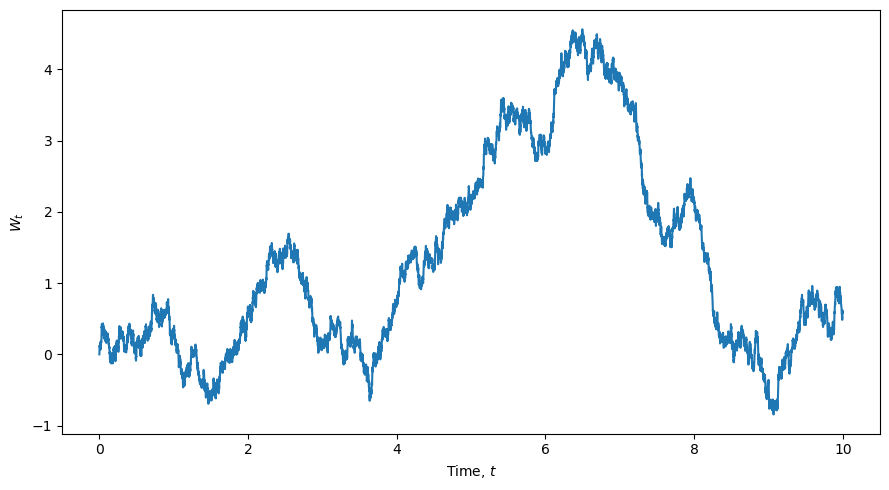

In [7]:
dt = 0.001
Tmax = 10
Nt = int(Tmax/dt)+1

# Time
t = dt*np.arange(Nt)

# Wiener process:
#  * First element is zero
#  * The following elements are the cumulative sum
#    of Gaussian random numbers with variance = dt,
#    which means standard deviation = sqrt(dt).
W = np.zeros(Nt)
W[1:] = np.cumsum( np.random.normal(loc = 0, scale = np.sqrt(dt), size = Nt-1) )

fig, ax = plt.subplots(figsize = (9, 5))
plt.plot(t, W)
plt.xlabel('Time, $t$')
plt.ylabel('$W_t$')
plt.tight_layout()

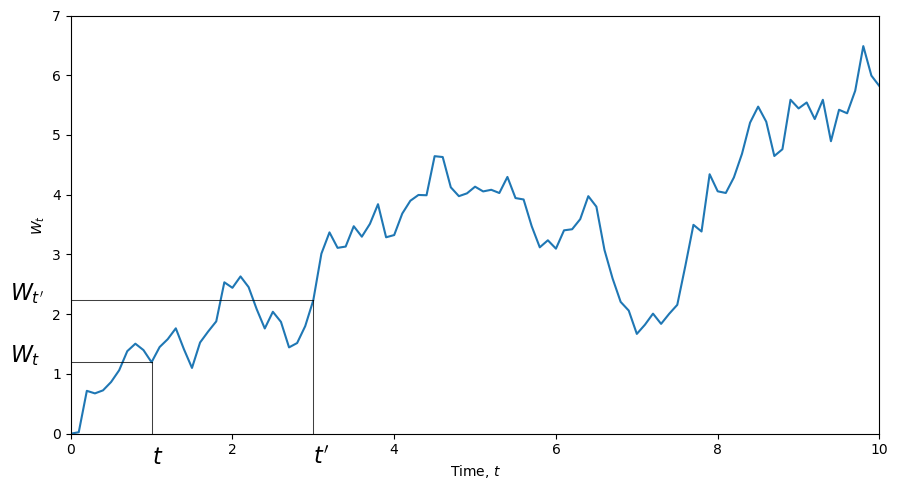

In [8]:
dt = 0.1
Nt = 101

# Time
t = dt*np.arange(Nt)

# Wiener process:
#  * First element is zero
#  * The following elements are the cumulative sum
#    of Gaussian random numbers with variance = dt,
#    which means standard deviation = sqrt(dt).
W = np.zeros(Nt)
np.random.seed(18) # Setting seed to get consistent look
W[1:] = np.cumsum( np.random.normal(loc = 0, scale = np.sqrt(dt), size = Nt-1) )

# Plot and indicate two different increments
fig, ax = plt.subplots(figsize = (9, 5))
plt.plot(t, W)
for i, it in enumerate([10, 30]):
    plt.plot([dt*it, dt*it], [0, W[it]], c='k', lw=0.75, alpha=0.75)
    plt.plot([0, dt*it], [W[it], W[it]], c='k', lw=0.75, alpha=0.75)
    if i == 0:
        plt.text(dt*it, -0.5, "$t$", fontsize=16)
        plt.text(-0.75, W[it], "$W_t$", fontsize=16)
    else:
        plt.text(dt*it, -0.5, "$t'$", fontsize=16)
        plt.text(-0.75, W[it], "$W_{t'}$", fontsize=16)

plt.ylim(0, 7)
plt.xlim(0, 10)
plt.xlabel('Time, $t$')
plt.ylabel('$W_t$')
plt.tight_layout()

## Different realisations

Every time we make a new realisation of the Wiener process, it is different

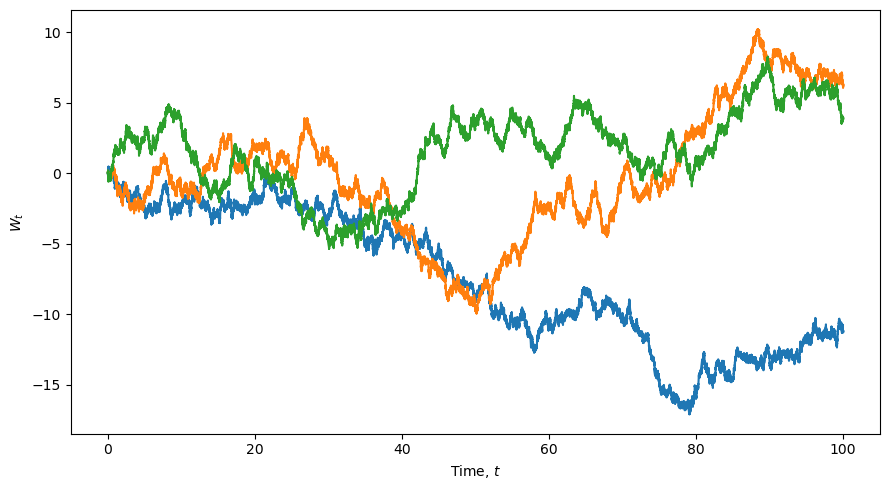

In [9]:
dt = 0.001
Tmax = 100
Nt = int(Tmax/dt)+1
Np = 3 # Number of realisations

# Time
t = np.linspace(0, Tmax, Nt)

# Wiener process:
#  * First element is zero
#  * The following elements are the cumulative sum
#    of Gaussian random numbers with variance = dt,
#    which means standard deviation = sqrt(dt).
W = np.zeros((Nt, Np))
W[1:,:] = np.cumsum( np.random.normal(loc = 0, scale = np.sqrt(dt), size = (Nt-1, Np)), axis =0)

# Plot the three different realisations
fig = plt.figure(figsize = (9, 5))
plt.plot(t, W)
plt.xlabel('Time, $t$')
plt.ylabel('$W_t$')
plt.tight_layout()

## Variance is linear in time

Since the Wiener process is, by definition, the sum of Gaussian random variables, we have that the variance of the Wiener process as a function of time is the variance of an increasing sum of Gaussian random variables, which is just the sum of the individual variances:

If $X$ and $Y$ are independent Gaussian random variables with means $\mu_X$ and $\mu_Y$, and variances, $\sigma^2_X$ and $\sigma^2_Y$, i.e.

$$X \sim \mathcal{N}(\mu_X, \sigma^2_X), $$
$$Y \sim \mathcal{N}(\mu_Y, \sigma^2_Y), $$

then their sum, $Z=X+Y$ is also a Gaussian random variable, 

$$Z \sim \mathcal{N}(\mu_X+\mu_Y, \sigma^2_X + \sigma^2_Y).$$

Hence we have:

$$ \mathrm{var}(W_{t_n}) = \sum_{i=1}^{n} \mathrm{var} (W_{t_i} - W_{t_{i-1}}) = \sum_{i=1}^{n} (t_i - t_{i-1}) = t$$

If we make a large number of Wiener processes, we can take the variance as a function of time, and confirm that it increases linearly, as it should: By the definition above, we should have 
$$ \mathrm{var}( W_t - W_0 ) = t.$$

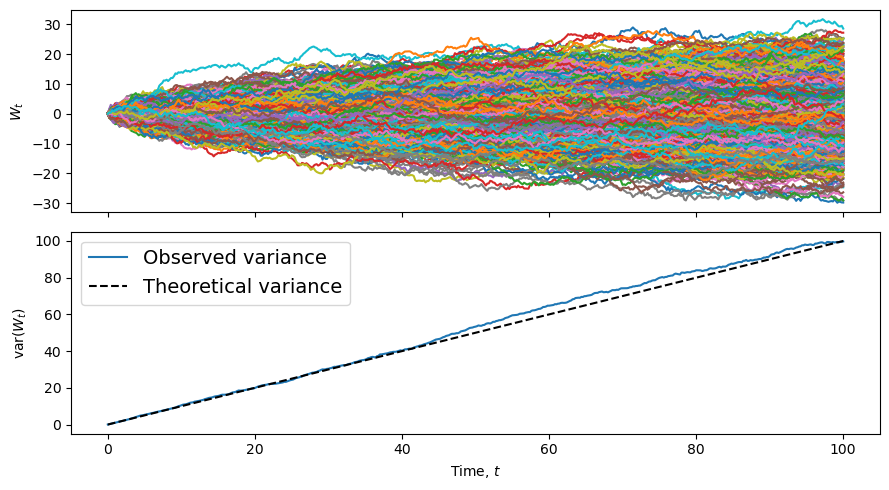

In [10]:
dt = 0.2
Tmax = 100
Nt = int(Tmax/dt)+1

# Time
t = np.linspace(0, Tmax, Nt)

# N Wiener processes:
N = 1000
W = np.zeros((Nt, N))
W[1:,:] = np.cumsum( np.random.normal(loc = 0, scale = np.sqrt(dt), size = (Nt-1, N)), axis =0)

# Plot the three different realisations
fig, ax = plt.subplots(nrows = 2, figsize = (9, 5), sharex = True)
ax[0].plot(t, W)
ax[0].set_ylabel('$W_t$')

ax[1].plot(t, np.var(W, axis = 1), label = 'Observed variance')
ax[1].plot(t, t, '--', c = 'k', label = 'Theoretical variance')
ax[1].set_xlabel('Time, $t$')
ax[1].set_ylabel('$\mathrm{var}(W_t)$')
ax[1].legend(fontsize = 14)
plt.tight_layout()

## Equivalence between Wiener process and diffusion equation

If we create a large number of Wiener processes, then their probability distribution, $p(x, t)$, will develop as described by the following diffusion equation:

$$ \frac{\partial p}{\partial t} = \frac{1}{2} \frac{\partial^2 p}{\partial x^2}. $$

The analytical solution to this equation, if $p(x, t=0) = \delta(x)$, is a Gaussian distribution with variance  $\sigma^2 = t$:

$$ p(x, t) = \frac{1}{\sqrt{2\pi t}} \exp \left( -\frac{x^2}{2t} \right). $$

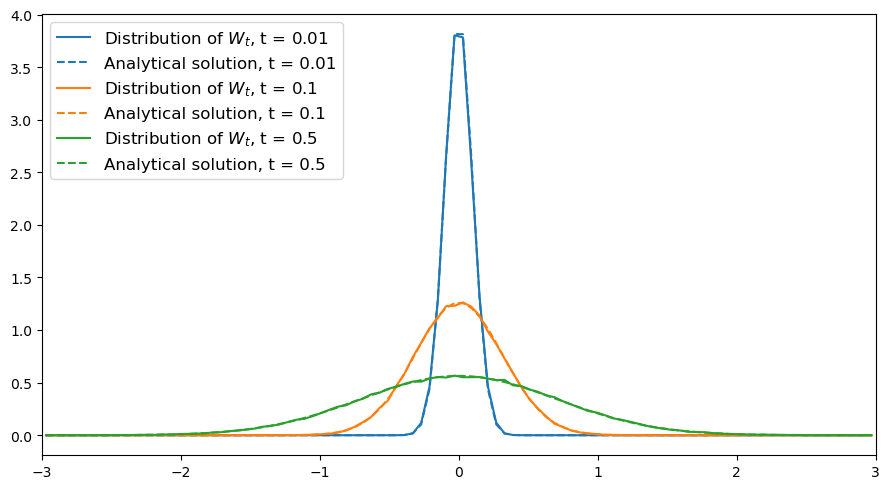

In [11]:
dt = 0.01
Tmax = 10
Nt = int(Tmax/dt)+1

# Time
t = np.linspace(0, Tmax, Nt)

# 1000 Wiener processes:
N = 100000
W = np.zeros((Nt, N))
W[1:,:] = np.cumsum( np.random.normal(loc = 0, scale = np.sqrt(dt), size = (Nt-1, N)), axis=0)

# Analytical solution
pdf = lambda x, t: np.exp(-x**2/(2*t))/(np.sqrt(2*np.pi*t))

# Create histogram of distribution, at different times
# and plot with the analytical solution
fig = plt.figure(figsize = (9, 5))
bins, dx = np.linspace(-3, 3, 101, retstep = True)
mids = bins[:-1] + dx/2
for i in [1, 10, 50]:
    hist, _ = np.histogram(W[i,:], bins = bins, density = True)
    l, = plt.plot(mids, hist, label = f'Distribution of $W_t$, t = {i*dt}')
    plt.plot(mids, pdf(mids, i*dt), '--', c = l.get_color(), label = f'Analytical solution, t = {i*dt}')

plt.legend(loc = 'upper left', fontsize = 12)
plt.xlim(-3, 3)
plt.tight_layout()

# Central limit theorem

When working with random variables, we will often be interested in the mean of a set of realisations of a random variable. Let's say that we have a random variable, $X$, which has some distribution (not necessarily Gaussian), with mean $\mu$ and finite (i.e., not infinite) variance $\sigma^2$. We draw a sample of $N$ realisations, and calculate the sample mean,

$$ \mu_N = \frac{1}{N} \sum_{i=1}^N X_i. $$

We are then interested in the error in the sample mean

$$ E(N) = \mu_N - \mu. $$

## Example: Sampling from the Maxwell distribution

In [12]:
from scipy.stats import maxwell, norm


True mean   = 1.59577, true variance   = 0.45352
Sample mean = 1.59674, sample variance = 0.45680

Error in sample mean = 0.00097


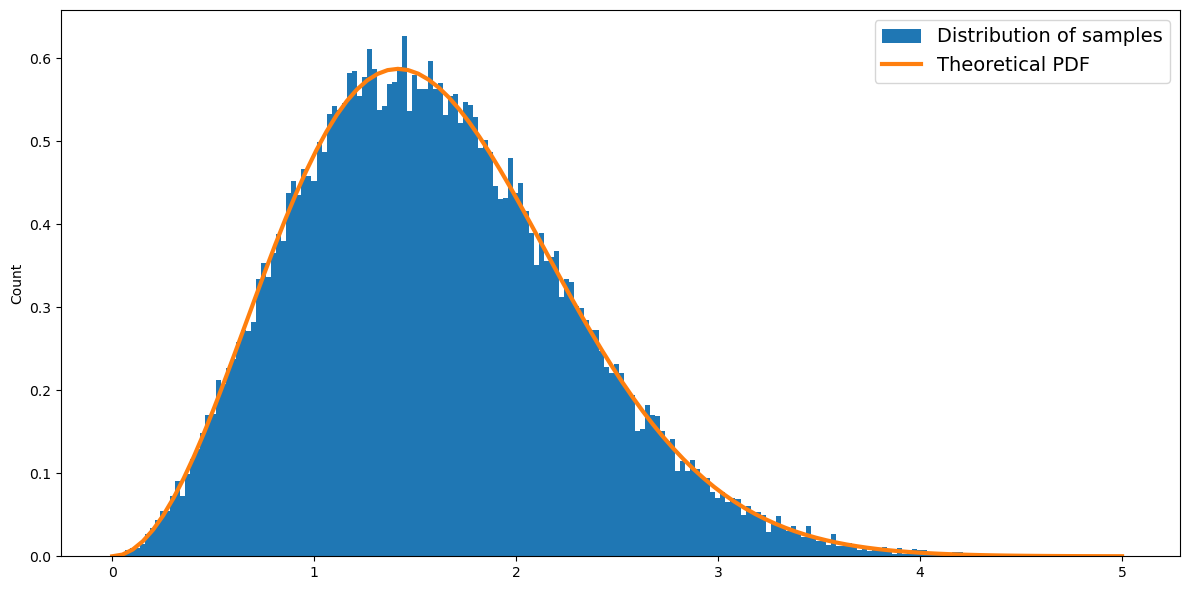

In [13]:
# Create a distribution object
p = maxwell()

# print theoretical mean and variance of distribution
mean, var = p.stats(moments = 'mv')
print(f'True mean   = {mean:.5f}, true variance   = {var:.5f}')

# Draw N random samples, and plot histogram
N = 50000
# draw N random variables with the .rvs() method of p
X = p.rvs(N)

# print sample mean and sample variance
print(f'Sample mean = {np.mean(X):.5f}, sample variance = {np.var(X):.5f}')

# Print error in sample mean
print(f'\nError in sample mean = {np.mean(X) - mean:.5f}')

fig = plt.figure(figsize = (12, 6))
plt.hist(X, bins = 200, density = True, label = 'Distribution of samples')
# Plot PDF for range from 0 to 5
x = np.linspace(0, 5, 100)
plt.plot(x, p.pdf(x), lw = 3, label = 'Theoretical PDF')
plt.ylabel('Count')
plt.legend(fontsize = 14)
plt.tight_layout()

## The Lindeberg-Lévy Theorem

The Central Limit Theorem (CLT) exists in several variants, for example the Lindeberg-Lévy CLT (Billingsley, 1979, p. 308).

Suppose that $\{X_1, X_2, \ldots, X_N\}$ are independent samples from some probability distribution, $p$, with mean $\mu$ and variance $\sigma^2 < \infty$. Then $\mu_N = \frac{1}{N}\sum_{i=1}^N X_i$ is called the *sample mean*. If you draw $N$ samples several times, then $\mu_N$ will generally have a different value each time, such that $\mu_N$ is essentially a random variable. According to the *strong law of large numbers*, $\mu_N \to \mu$ as $N \to \infty$, almost surely. ("Almost surely" is a technical term that means "with probability 1". It basically means that you can construct counterexamples, but they have zero probability of occuring. For example, if you roll a 6-sided die $N$ times, then the average value will approach 3.5 with probability 1 as $N \to \infty$. You could imagine throwing a 6 every time, but the probability of this goes to 0 as $N \to \infty$.)


Furthermore, we have that the error in the sample mean is given by $E_N = \mu - \mu_N$, where $\mu$ is the *true* mean of the distribution (which will often be unknown). Then the Lindeberg-Lévy CLT says that the distribution of the error, $E_N$ in the sample mean is given by

$$ E_N \sim  \frac{1}{\sqrt{N}} \mathcal{N}(0, \sigma^2), $$

where $\mathcal{N}(0, \sigma^2)$ is a Gaussian distribution with zero mean and variance $\sigma^2$, and $\sigma^2$ is the (usually unknown) variance of the original distribution $p$.

#### The convergence with $1/\sqrt{N}$ is an important and universal feature of Monte Carlo methods.

## Example: Error in sample mean from Maxwell distribution

Draw $N$ samples from the Maxwell distribution, calculate the sample mean and the error in the sample mean, and repeat $M$ times.

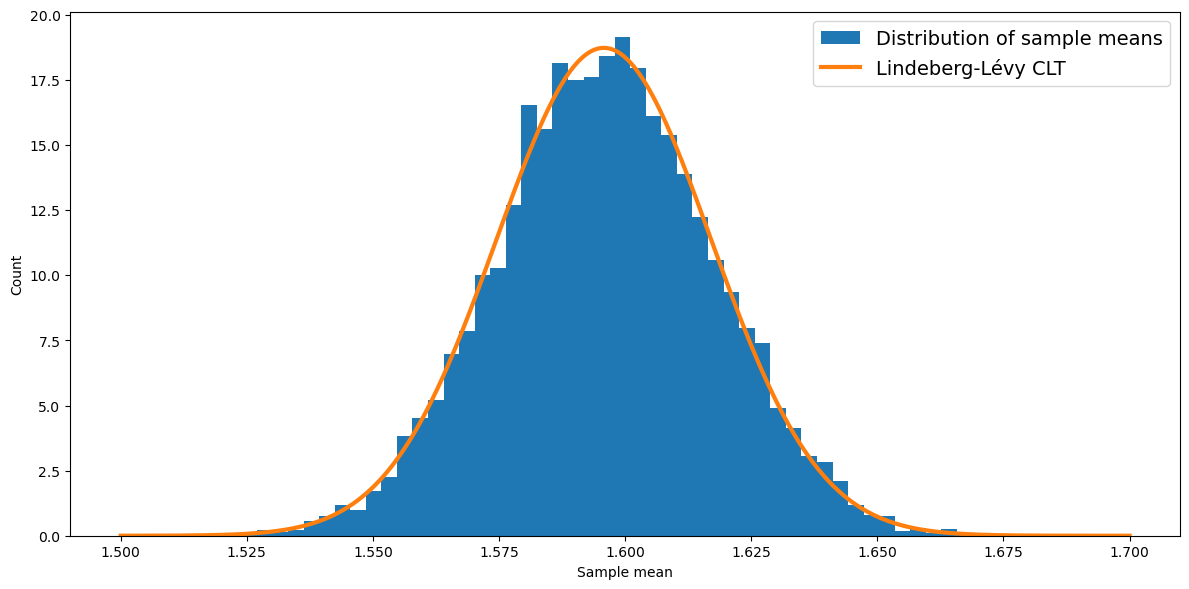

In [14]:
# Draw N random samples, and calculate mean M times
N = 1000
M = 10000


sample_means = np.zeros(M)
for i in range(M):
    # draw N random variables with the .rvs() method of p
    X = p.rvs(N)
    # Calcualte sample mean and store result
    sample_means[i] = np.sum(X)/N
    
#print(sample_means)
fig = plt.figure(figsize = (12, 6))
plt.hist(sample_means, bins = 50, density = True, label = 'Distribution of sample means')
# Plot theoretical distribution from Lindeberg-Lévy CLT
x = np.linspace(1.5, 1.7, 1000)
plt.plot(x, norm(loc = mean, scale = np.sqrt(var/N)).pdf(x), lw = 3, label = 'Lindeberg-Lévy CLT')
plt.xlabel('Sample mean')
plt.ylabel('Count')
plt.legend(fontsize = 14)
plt.tight_layout()

# Some properties of the Wiener process

* The Wiener process is continuous (but not Lipschitz continuous)
* The Wiener process is differentiable nowhere
* The Wiener process has infinite total variation, on any interval of non-zero length

We will not prove any of these properties, but just sketch some arguments.


## Continuity

The Wiener process is continuous in the sense that

$$ E\left( \left| W_{t+\Delta t} - W_t \right| \right) = \left\langle \left| W_{t+\Delta t} - W_t \right| \right\rangle \to 0 \;\;\mathrm{when}\;\; \Delta t \to 0.$$

We recall from above that the increments of the Wiener process are Gaussian random numbers, with zero mean and variance $\left\langle \left( W_{t+\Delta t} - W_t \right)^2 \right\rangle = \Delta t$. This suggests that $\left\langle \left| W_{t+\Delta t} - W_t \right| \right\rangle = \sqrt{\Delta t}$, which does indeed go to zero when $\Delta t$ goes to zero.


But the Wiener process is not Lipschitz continuous. If it was, there would exist some constant $K$ such that we have

$$ \left| W_t - W_s \right| < K |t - s| $$

everywhere, or in other words, the slope ("derivative") of the process would be smaller than $K$ everywhere. But since $\left\langle \left| W_{t+\Delta t} - W_t \right| \right\rangle = \sqrt{\Delta t}$, we have

$$ \left\langle \frac{\left| W_{t+\Delta t} - W_t \right|}{\Delta t} \right\rangle  = \frac{\sqrt{\Delta t}}{\Delta t} = \frac{1}{\sqrt{\Delta t}}$$

which diverges as $\Delta t \to 0$, and thus there is no such constant $K$.

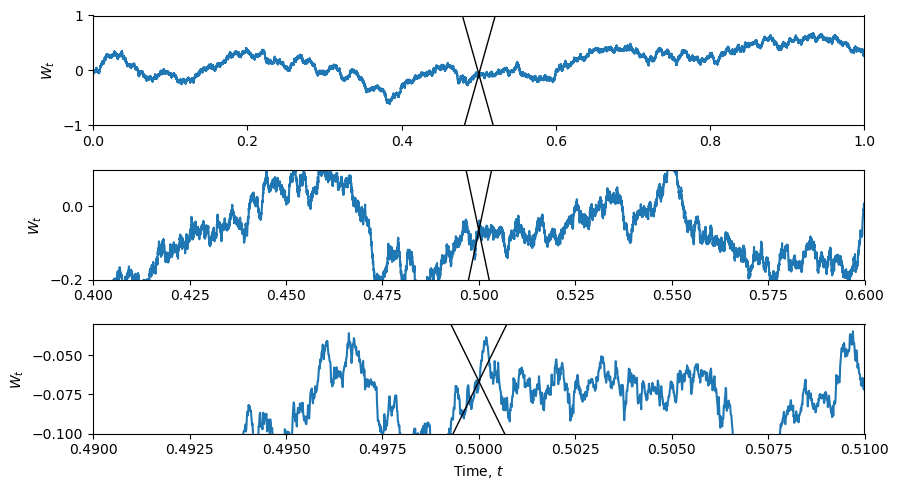

In [15]:
# Lipschitz constant
K = 50

# Timestep, etc (should be quite small to look nice when we zoom)
dt = 0.00001
Tmax = 1
Nt = int(Tmax/dt)+1

# Time
t = dt*np.arange(Nt)

# Wiener process:
W = np.zeros(Nt)
# Set random seed to get consistent look
np.random.seed(42)
W[1:] = np.cumsum( np.random.normal(loc = 0, scale = np.sqrt(dt), size = Nt-1) )

# Create three plots at increasing zoom level
fig, ax = plt.subplots(nrows=3, figsize = (9, 5))

for a in ax:
    # Plot Wiener process
    a.plot(t, W)
    # Plot maximum slope allowed by Lipchitz constant,
    # located at midpoint, and shifted up or down to match Wt
    mid = Tmax/2
    a.plot(t, K*(t-mid) + W[int(Nt/2)], c='k', lw=1)
    a.plot(t, -K*(t-mid) + W[int(Nt/2)], c='k', lw=1)
    a.set_ylabel('$W_t$')
    
ax[0].set_xlim(0, Tmax)
ax[0].set_ylim(-1, 1)
ax[1].set_xlim(Tmax/2-0.1*Tmax, Tmax/2+0.1*Tmax)
ax[1].set_ylim(-0.2, 0.1)
ax[2].set_xlim(Tmax/2-0.01*Tmax, Tmax/2+0.01*Tmax)
ax[2].set_ylim(-0.1, -0.03)


plt.xlabel('Time, $t$')
plt.tight_layout()

## Differentiable nowhere

We will skip lightly over this point, and just state that for a function to be diffentiable, it needs to be Lipschitz continuous, which the Wiener process is not. The point is just to remember that expressions like

$$\frac{\mathrm{d} W_t}{\mathrm{d} t} $$

do not strictly make sense.

## Infinite total variation

The total variation is essentially the length of the path of a function. It is found by adding the absolute value of the increments of the function, and letting the length of the increments go to zero.

To find the total variation of the Wiener process on the interval $[0, T]$, we divide the interval into $N$ sub-intervals of length $\Delta t$, such that $\Delta t = T/N$, and $t_n = n \Delta t$. Then we take the sum

$$\sum_{n=1}^N \left|W_{t_{n}} - W_{t_{n-1}}\right|,$$

and we let $N\to\infty$ while keeping $\Delta t = T/N$.

We know that the exectation value of $\left|W_{t_{n}} - W_{t_{n-1}}\right|$ is $\sqrt{t_n - t_{n-1}} = \sqrt{\Delta t}$, and we know that $N = T/\Delta t$, so we can say that the expectation value of the sum is 

$$ N \sqrt{\Delta t} = T \frac{\sqrt{\Delta t}}{\Delta t} = \frac{T}{\sqrt{\Delta t}} $$

We recall that $T$ is a constant (the length of the interval we chose), so the sum diverges as we let the length of the sub-intervals go to zero, $\Delta t \to 0$.

Hence, the length of the path of the Wiener process is infinite, for any interval of length $T>0$.

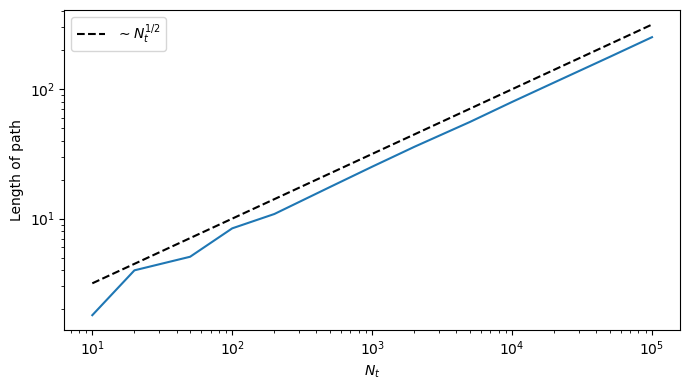

In [16]:
# Generate Wiener process with increasing number of points, and look at how the length changes

# Fixed length of interval
Tmax = 1

# Check for these numbers of points
Nt_list = np.array([10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000])
# Array to store length of path
L_list = np.zeros(len(Nt_list))

for i, Nt in enumerate(Nt_list):
    dt = Tmax/Nt
    # Time
    t = dt*np.arange(Nt)

    # Wiener process:
    W = np.zeros(Nt)
    W[1:] = np.cumsum( np.random.normal(loc = 0, scale = np.sqrt(dt), size = Nt-1) )
    
    # Calculate length
    L_list[i] = np.sum(np.abs(W[1:] - W[:-1]))

fig = plt.figure(figsize=(7, 4))
# Plot length of path as function of number of increments
plt.plot(Nt_list, L_list)
# Plot line with slope 1/2 to compare
plt.plot(Nt_list, Nt_list**(1/2), '--', c='k', label='$\sim N_t^{1/2}$')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('$N_t$')
plt.ylabel('Length of path')
plt.tight_layout()


# References

Billingsley, P. (1979), _Probability and measure_, John Wiley & Sons, New York Chichester Brisbane Toronto.

Chandrasekhar, S. (1943), "Stochastic problems in physics and astronomy", _Reviews of modern physics_, 15(1), pp. 1--89. https://doi.org/10.1103/RevModPhys.15.1

Feynman, R.P. and Leighton, R.B. and Sands, M. (2010), _The Feynman Lectures on Physics: New Millennium Edition_, Basic Books, New York (Originally published 1963--1965). 